# 단순선형회귀

In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

## 1. 아버지와 아들의 키  - Galton

In [4]:
df = pd.read_csv('https://www.randomservices.org/random/data/Galton.txt',sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


- 아버지와 아들의 키만 발췌하고 단위를 cm으로 변환

In [7]:
df = df[df.Gender =='M']
height = df[['Father','Height']].rename(columns={'Height':'Son'})
height.head()

,Father,Son
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5
8,75.0,71.0
10,75.0,70.5


In [8]:
height = height * 2.54
height.head()

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150
8,190.50,180.340
10,190.50,179.070


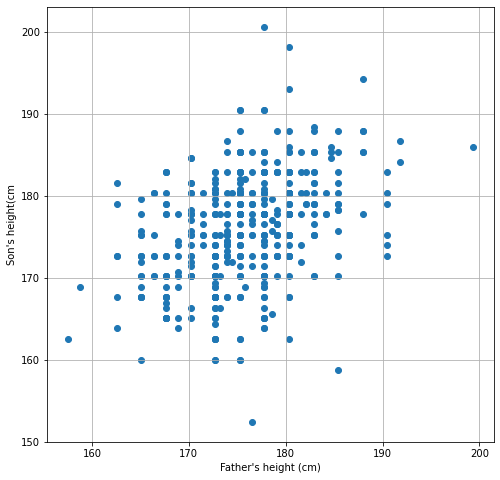

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(height.Father, height.Son)
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height(cm")
plt.grid()
plt.show()

- Numpy 최소 자승법을 이용해서 회귀선 구하기 
##### 최소자승법:  데이터와 선형과의 거리의 제곱의 합이 최소가 되는 것 

In [14]:
A = np.vstack([height.Father, np.ones(len(height.Father))]).T
A.shape

(465, 2)

In [15]:
height.Father.shape # 465의 한줄짜리 

(465,)

In [16]:
reg = np.linalg.lstsq(A, height.Son, rcond=None)
reg

# (array([ 0.44774792 기울기, 97.17763701 절편])

(array([ 0.44774792, 97.17763701]),
 array([17556.59951549]),
 2,
 array([3.79064358e+03, 7.15847817e-01]))

In [17]:
# 기울기와 절편 
m, c = reg[0]

In [18]:
# 잔차 제곱의 합 (Residual Sum of Square)
rss = reg[1][0]

In [19]:
m,c, rss

(0.44774791760302285, 97.1776370073939, 17556.599515494014)

In [20]:
print(f'기울기: {m:.4f}, 절편: {c:.4f}, 잔차제곱: {rss:.2f}')

기울기: 0.4477, 절편: 97.1776, 잔차제곱: 17556.60


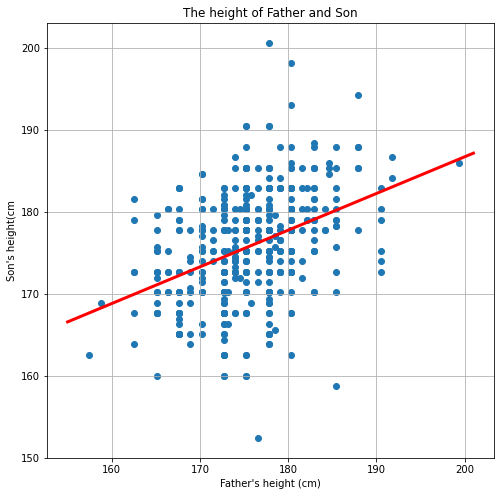

In [21]:
plt.figure(figsize=(8,8))
plt.scatter(height.Father, height.Son)

plt.plot([155,201],[m*155+c, m*201+c],'r',lw=3) # 빨간선 그리기 

plt.title('The height of Father and Son')
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height(cm")

plt.grid()
plt.show()

- Sckit-Learn

In [ ]:
from sklearn.linear_model import LinearRegression
X = height.Father.values.reshape(-1,1)
y = height.Son.values
lr = LinearRegression()
lr.fit(X, y)
weight, bias, rss = lr.coef_, lr.intercept_, lr._residues
print(f'기울기: {weight[0]:.4f}, 절편: {bias:.4f}, 잔차제곱: {rss:.2f}')
score = lr.score(X, y)
print(f'R_squared score: {score:.4f}')

------------------------------------

In [28]:
from sklearn.linear_model import LinearRegression

In [23]:
height.Father.values.shape # 이걸 (465,1) 형태의 2차원으로 만들어줘야함 

(465,)

In [25]:
X = height.Father.values.reshape(-1,1) # 이건 하수가 하는 것 (465,1) 
y = height.Son.values

In [26]:
X.shape, y.shape

((465, 1), (465,))

In [30]:
lr = LinearRegression()
lr.fit(height.Father.values,height.Son.values)

# ValueError: Expected 2D array, got 1D array instead:
# 2D로 바꿔주라는 오류남 

ValueError: Expected 2D array, got 1D array instead:
array=[199.39  191.77  191.77  190.5   190.5   190.5   190.5   190.5   190.5
 187.96  187.96  187.96  187.96  187.96  187.96  185.42  185.42  185.42
 185.42  185.42  185.42  185.42  185.42  185.42  185.42  185.42  185.42
 185.42  184.658 184.658 184.658 182.88  182.88  182.88  182.88  182.88
 182.88  182.88  182.88  182.88  182.88  182.88  182.88  182.88  184.15
 184.15  184.15  182.88  182.88  182.88  182.88  182.88  182.88  182.88
 180.34  180.34  180.34  180.34  180.34  180.34  180.34  180.34  180.34
 180.34  180.34  180.34  180.34  180.34  180.34  180.34  182.118 180.34
 180.34  180.34  180.34  181.61  181.61  181.61  180.34  180.34  182.118
 182.118 182.118 180.34  180.34  180.34  181.61  181.61  181.61  180.34
 180.34  180.34  180.34  180.34  180.34  180.34  180.34  180.34  180.34
 180.34  180.34  180.34  180.34  180.34  180.34  180.34  180.34  180.34
 180.34  180.34  180.34  177.8   177.8   177.8   177.8   177.8   177.8
 177.8   177.8   177.8   177.8   177.8   177.8   179.07  179.07  179.07
 179.07  177.8   177.8   177.8   177.8   177.8   177.8   177.8   177.8
 177.8   177.8   177.8   177.8   177.8   177.8   177.8   177.8   177.8
 177.8   177.8   177.8   177.8   177.8   177.8   177.8   177.8   177.8
 177.8   177.8   177.8   177.8   179.07  179.07  179.07  179.07  179.07
 179.07  177.8   177.8   177.8   177.8   177.8   177.8   177.8   177.8
 177.8   177.8   179.07  179.07  179.07  177.8   177.8   177.8   177.8
 177.8   177.8   179.07  179.07  179.07  179.07  179.07  178.562 178.562
 178.562 178.562 179.07  179.07  177.8   177.8   177.8   177.8   177.8
 177.8   177.8   177.8   175.26  175.26  175.26  175.26  175.26  175.26
 175.26  175.26  175.26  175.26  175.26  175.26  175.26  175.26  175.26
 175.26  175.26  175.26  175.26  175.26  175.26  175.26  175.26  176.53
 176.53  175.26  176.53  176.53  176.53  176.53  175.26  175.26  175.26
 175.26  175.26  175.26  175.26  176.53  176.53  176.53  175.768 175.768
 175.26  175.26  175.26  175.26  175.26  175.26  175.26  175.26  175.26
 175.26  176.53  176.53  176.53  175.26  175.26  175.26  175.26  175.26
 175.26  175.26  175.26  175.26  175.26  176.53  176.53  176.53  175.26
 175.26  175.26  175.26  175.26  175.26  175.26  175.26  175.26  175.26
 174.498 173.99  173.99  173.99  173.99  173.99  173.99  173.99  173.99
 173.99  173.99  173.99  172.72  172.72  172.72  172.72  172.72  172.72
 172.72  172.72  172.72  173.99  173.99  173.99  173.99  172.72  172.72
 172.72  172.72  172.72  172.72  172.72  172.72  172.72  172.72  172.72
 172.72  172.72  172.72  172.72  172.72  172.72  172.72  173.99  173.99
 173.99  172.72  172.72  172.72  172.72  172.72  172.72  172.72  172.72
 172.72  172.72  172.72  173.99  172.72  173.228 173.228 173.228 173.228
 172.72  174.498 172.72  172.72  172.72  172.72  172.72  172.72  172.72
 172.72  172.72  173.99  172.72  172.72  172.72  172.72  172.72  172.72
 170.18  170.18  170.18  170.18  170.18  170.18  170.18  170.18  170.18
 170.18  170.18  171.45  171.45  170.18  170.18  170.18  170.18  170.18
 170.18  170.18  170.18  170.18  170.18  170.18  170.18  170.18  171.45
 171.45  171.45  171.45  170.18  167.64  167.64  167.64  167.64  167.64
 167.64  167.64  167.64  167.64  167.64  167.64  167.64  168.91  168.91
 168.91  168.91  167.64  167.64  167.64  167.64  168.91  168.91  168.91
 168.91  168.91  167.64  167.64  167.64  167.64  167.64  167.64  167.64
 167.64  167.64  167.64  167.64  167.64  165.1   165.1   165.1   165.1
 165.1   165.1   165.1   165.1   165.1   165.1   165.1   165.1   165.1
 165.1   165.1   165.1   165.1   166.37  166.37  166.37  166.37  166.37
 166.37  166.37  162.56  162.56  162.56  162.56  162.56  162.56  157.48
 158.75  173.99  173.99  173.99  173.99  173.99 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [31]:
lr = LinearRegression()
lr.fit(X, y) # X는 2D array 이어야 함 

LinearRegression()

In [ ]:
# y =ax +b 
# y = wx+b weight bias x는 2D형태로 들어와서 w도 매트릭스형태 

In [34]:
weight, bias, rss = lr.coef_, lr.intercept_, lr._residues
rss = lr._residues
weight[0],bias, rss

(0.4477479176030255, 97.17763700739346, 17556.59951549399)

In [35]:
# R squared 
lr.score(X, y)

0.15312927478306992

In [36]:
score = lr.score(X, y)
print(f'R_squared score: {score:.4f}')

R_squared score: 0.1531


In [ ]:
경사하강ㅂ법 기울기에 따라서 + - 정해지고 음수면 양수쪽으로 양수면 음수쪽으로 내려옴 
기울기가 음수면 양수쪽으로. 컴퓨터가 기울기가 0인점을 찾는것. 미분을 하면되는데 컴퓨터는 시뮬레이션 방식에 의해 해결함 

미분: 순간 변화율 
x값이 살짝 움직였을 때 y값이 어떤 것인가
